### Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import math

### Load data

In [2]:
path = '/Users/jooyong/github_locals/Soccer_Player_Recommendation_Service/data/match_details(from_Transfermarket)/Bundesliga_match_details/'
file_list = os.listdir(path)

Premier_matches = pd.DataFrame()
for file in file_list:

    filepath = path + file
    Premier_matches = pd.concat([Premier_matches, pd.read_json(filepath, lines=True)], axis=0)

In [3]:
Premier_matches.tail(5)

,match_general_info,team_details,event_details
4000,"{'day': 'Sat', 'date': '9/2/23', 'starttime': ...","{'home': {'name': 'FC Augsburg', 'rank': '12',...","{'home': {'goal': [{'scorer': 'Dion Beljo', 'g..."
4001,"{'day': 'Sat', 'date': '9/2/23', 'starttime': ...","{'home': {'name': 'VfB Stuttgart', 'rank': '3'...","{'home': {'goal': [{'scorer': 'Chris Führich',..."
4002,"{'day': 'Sat', 'date': '9/2/23', 'starttime': ...","{'home': {'name': 'Borussia Mönchengladbach', ...","{'home': {'goal': [{'scorer': 'Ko Itakura', 'g..."
4003,"{'day': 'Sun', 'date': '9/3/23', 'starttime': ...","{'home': {'name': 'Eintracht Frankfurt', 'rank...",{'home': {'goal': [{'scorer': 'Niels Nkounkou'...
4004,"{'day': 'Sun', 'date': '9/3/23', 'starttime': ...","{'home': {'name': '1.FC Union Berlin', 'rank':...","{'home': {'card': [{'name': 'Alex Kral', 'card..."


In [4]:
print('number of matches from season 2010/2011 to the date the data scraped:', len(Premier_matches))

number of matches from season 2010/2011 to the date the data scraped: 4005


### Match general information analysis
#### Observe initial form

In [5]:
match_general_info = pd.DataFrame(Premier_matches['match_general_info'].to_list())

In [6]:
match_general_info.head(5)

,day,date,starttime,stadium,attendance,referee,score
0,Fri,8/20/10,8:30 PM,Allianz Arena,69.000,Thorsten Kinhöfer,2:1
1,Sat,8/21/10,3:30 PM,PreZero Arena,30.164,Günter Perl,4:1
2,Sat,8/21/10,3:30 PM,Stadion im Borussia-Park,42.202,Peter Gagelmann,1:1
3,Sat,8/21/10,3:30 PM,RheinEnergieSTADION,49.200,Dr. Felix Brych,1:3
4,Sat,8/21/10,3:30 PM,Dreisamstadion,24.000,Dr. Jochen Drees,1:3


In [7]:
for column in match_general_info.columns:

    print(column, match_general_info[column].isnull().sum())


day 0
date 0
starttime 0
stadium 0
attendance 373
referee 0
score 0


Attendance data need to be observed after converting string-type date to date-type date to check why many null values exist.

#### Data pre-processing

In [8]:
def home_score(row):
    try:
        temp = row.split(':')
        home = int(temp[0])
    except:
        home = row
    return home
def away_score(row):
    try:
        temp = row.split(':')
        away = int(temp[1])
    except:
        away = row
    return away

match_general_info['home_score'] = match_general_info['score'].apply(lambda x: home_score(x))
match_general_info['away_score'] = match_general_info['score'].apply(lambda x: away_score(x))

match_general_info['date'] = pd.to_datetime(match_general_info['date'])
match_general_info['starttime'] = pd.to_datetime(match_general_info['starttime']).apply(lambda x: datetime.time(x))

In [9]:
match_general_info.head(5)

,day,date,starttime,stadium,attendance,referee,score,home_score,away_score
0,Fri,2010-08-20,20:30:00,Allianz Arena,69.000,Thorsten Kinhöfer,2:1,2,1
1,Sat,2010-08-21,15:30:00,PreZero Arena,30.164,Günter Perl,4:1,4,1
2,Sat,2010-08-21,15:30:00,Stadion im Borussia-Park,42.202,Peter Gagelmann,1:1,1,1
3,Sat,2010-08-21,15:30:00,RheinEnergieSTADION,49.200,Dr. Felix Brych,1:3,1,3
4,Sat,2010-08-21,15:30:00,Dreisamstadion,24.000,Dr. Jochen Drees,1:3,1,3


In [10]:
# cases having null value for attendance
match_general_info[match_general_info['attendance'].isnull()]

,day,date,starttime,stadium,attendance,referee,score,home_score,away_score
2942,Wed,2020-03-11,18:30:00,Stadion im Borussia-Park,None,Deniz Aytekin,2:1,2,1
2969,Wed,2020-06-03,20:30:00,Wohninvest-Weserstadion,None,Patrick Ittrich,0:3,0,3
2979,Sat,2020-05-16,15:30:00,SIGNAL IDUNA PARK,None,Deniz Aytekin,4:0,4,0
2980,Sat,2020-05-16,15:30:00,Red Bull Arena,None,Manuel Gräfe,1:1,1,1
2981,Sat,2020-05-16,15:30:00,PreZero Arena,None,Christian Dingert,0:3,0,3
...,...,...,...,...,...,...,...,...,...
3524,Sat,2022-01-08,15:30:00,Sportpark Ronhof | Thomas Sommer,None,Dr. Felix Brych,0:0,0,0
3527,Sun,2022-01-09,17:30:00,Vonovia Ruhrstadion,None,Daniel Schlager,1:0,1,0
3535,Sun,2022-01-16,15:30:00,WWK ARENA,None,Sven Jablonski,1:1,1,1
3542,Sat,2022-01-22,15:30:00,Sportpark Ronhof | Thomas Sommer,None,Robert Schröder,2:1,2,1


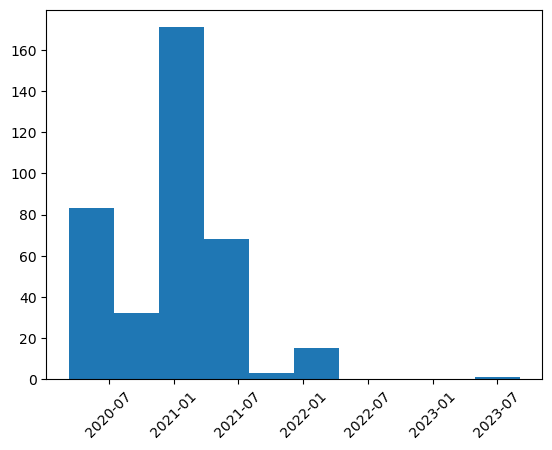

In [11]:
plt.hist(match_general_info[match_general_info['attendance'].isnull()]['date'])
plt.xticks(rotation = 45)
plt.show()

Most null cases for attendance were located in the season 2020-2021, possibly because of the pandemic. <br>
There were many games without game spectators during the pandemic(between 05.01.2020 and 07.01.2021), so 0 will replace null values for attendance. <br>

For other cases, the average attendance for the stadium will replace null values.

In [12]:
match_general_info.loc[(match_general_info['date']<='2021-07-01') & (match_general_info['date']>='2020-05-01'), 'attendance'] = \
    match_general_info[(match_general_info['date']<='2021-07-01') & (match_general_info['date']>='2020-05-01')]['attendance'].fillna('0')

print('Date and stadium of a game with null attendance. (Not pandemic season)')
match_general_info[match_general_info['attendance'].isnull()][['date', 'stadium']]

Date and stadium of a game with null attendance. (Not pandemic season)


,date,stadium
2942,2020-03-11,Stadion im Borussia-Park
3482,2021-11-28,Red Bull Arena
3485,2021-12-04,PreZero Arena
3487,2021-12-04,WWK ARENA
3493,2021-12-11,Allianz Arena
3494,2021-12-11,Red Bull Arena
3499,2021-12-12,Sportpark Ronhof | Thomas Sommer
3501,2021-12-14,MHPArena Stuttgart
3509,2021-12-15,WWK ARENA
3510,2021-12-17,Allianz Arena


In [13]:
# save indices for missing attendance samples to later check
attendance_missing_index = match_general_info[match_general_info['attendance'].isnull()].index

for stadium in set(match_general_info[match_general_info['attendance'].isnull()]['stadium']):

    average = pd.to_numeric(match_general_info[match_general_info['stadium']==stadium]['attendance'].dropna().apply(lambda x: x.replace('.', ''))).mean()
    if math.isnan(average)!=True:
        match_general_info.loc[match_general_info['stadium']==stadium,'attendance'] = match_general_info[match_general_info['stadium']==stadium]['attendance'].fillna(str(round(average)))
    
    else:
        print('cannot find an average, missing value filled out manually:', stadium)
        # max capacity of Kenilworth Road stadium is 11500, so I am going to use 10000.(because nothing left after drop null value)
        match_general_info.loc[match_general_info['stadium']==stadium,'attendance'] = match_general_info[match_general_info['stadium']==stadium]['attendance'].fillna(str(10000)) 

match_general_info['attendance'] = pd.to_numeric(match_general_info['attendance'].apply(lambda x: x.replace('.', ''))).apply(lambda x: round(x))

In [14]:
# to check missing attendances are filled out or not
for one_index in attendance_missing_index:
    print(match_general_info.loc[one_index]['date'].date(), match_general_info.loc[one_index]['attendance'])

2020-03-11 44019
2021-11-28 32182
2021-12-04 23778
2021-12-04 25039
2021-12-11 63868
2021-12-11 32182
2021-12-12 13848
2021-12-14 44206
2021-12-15 25039
2021-12-17 63868
2021-12-18 32182
2021-12-18 13848
2022-01-07 63868
2022-01-08 32182
2022-01-08 25084
2022-01-08 13848
2022-01-09 21233
2022-01-16 25039
2022-01-22 13848
2023-09-03 13180


As we can see above, missing attendance of matches after 07.01.2021 (no pandemic period) were filled with averages.

In [15]:
for column in match_general_info.columns:
    print(column, match_general_info[column].isnull().sum())

day 0
date 0
starttime 0
stadium 0
attendance 0
referee 0
score 0
home_score 0
away_score 0


Now, we don't have null values anymore.

#### Data Quality Check - Check if there are inappropriate values
##### categorical data

In [16]:
match_general_info.describe(include=['object'])

,day,starttime,stadium,referee,score
count,4005,4005,4005,4005,4005
unique,7,32,33,45,49
top,Sat,15:30:00,BayArena,Dr. Felix Brych,1:1
freq,2530,2497,223,231,466


In [17]:
match_general_info.describe(include=['datetime'], datetime_is_numeric=True)

,date
count,4005
mean,2017-01-22 02:56:53.932584192
min,2010-08-20 00:00:00
25%,2013-10-26 00:00:00
50%,2017-02-04 00:00:00
75%,2020-05-27 00:00:00
max,2023-09-03 00:00:00


In [18]:
match_general_info['day'].value_counts(dropna=False)

Sat    2530
Sun     838
Fri     367
Wed     140
Tue     103
Mon      24
Thu       3
Name: day, dtype: int64

In [19]:
match_general_info['date'].value_counts(dropna=False)

2015-05-16    9
2018-05-12    9
2019-05-18    9
2022-05-14    9
2016-05-07    9
             ..
2019-11-29    1
2014-11-07    1
2019-11-22    1
2014-11-28    1
2010-08-20    1
Name: date, Length: 1266, dtype: int64

In [20]:
match_general_info['starttime'].value_counts(dropna=False)

15:30:00    2497
20:30:00     477
18:30:00     409
17:30:00     285
20:00:00     117
18:00:00     117
19:30:00      23
13:30:00      19
15:31:00      14
15:32:00       9
15:45:00       4
20:40:00       4
20:31:00       3
20:32:00       3
20:45:00       3
18:32:00       2
15:33:00       2
15:40:00       2
17:45:00       2
20:15:00       1
20:03:00       1
17:31:00       1
18:31:00       1
17:32:00       1
20:02:00       1
17:40:00       1
18:02:00       1
15:35:00       1
18:45:00       1
14:00:00       1
20:36:00       1
18:03:00       1
Name: starttime, dtype: int64

In [21]:
match_general_info['stadium'].value_counts(dropna=False)

BayArena                            223
SIGNAL IDUNA PARK                   223
Stadion im Borussia-Park            223
PreZero Arena                       223
Volkswagen Arena                    222
Allianz Arena                       222
WWK ARENA                           206
Wohninvest-Weserstadion             206
Commerzbank Arena                   206
Mewa Arena                          205
Veltins-Arena                       204
MHPArena Stuttgart                  189
Olympiastadion Berlin               187
Dreisamstadion                      173
RheinEnergieSTADION                 171
Volksparkstadion                    136
Heinz-von-Heiden-Arena              136
Red Bull Arena                      120
Max-Morlock-Stadion                  85
Stadion An der Alten Försterei       70
MERKUR SPIEL-ARENA                   51
Vonovia Ruhrstadion                  35
Merck-Stadion am Böllenfalltor       35
Home Deluxe Arena                    34
SchücoArena                          34


In [22]:
match_general_info['referee'].value_counts(dropna=False)

Dr. Felix Brych            231
Felix Zwayer               205
Deniz Aytekin              198
Manuel Gräfe               188
Marco Fritz                188
Christian Dingert          173
Tobias Stieler             165
Daniel Siebert             155
Bastian Dankert            148
Robert Hartmann            143
Guido Winkmann             138
Markus Schmidt             130
Sascha Stegemann           130
Tobias Welz                123
Wolfgang Stark             123
Günter Perl                104
Knut Kircher               101
Florian Meyer              100
Harm Osmers                 94
Thorsten Kinhöfer           82
Peter Gagelmann             82
Frank Willenborg            79
Sven Jablonski              79
Peter Sippel                78
Dr. Jochen Drees            78
Benjamin Cortus             75
Patrick Ittrich             72
Michael Weiner              72
Robert Schröder             65
Daniel Schlager             63
Martin Petersen             59
Benjamin Brand              54
Florian 

##### numerical data


In [23]:
match_general_info.describe()

,attendance,home_score,away_score
count,4005.000000,4005.000000,4005.000000
mean,37459.239950,1.680649,1.311361
std,21051.413125,1.381568,1.224208
min,0.000000,0.000000,0.000000
25%,24125.000000,1.000000,0.000000
50%,36200.000000,1.000000,1.000000
75%,51000.000000,2.000000,2.000000
max,81365.000000,9.000000,8.000000


### Home/Away Team Details Analysis

#### Data pre-processing

In [24]:
team_details = pd.DataFrame(Premier_matches['team_details'].to_list())
home_team_details = pd.DataFrame(team_details['home'].to_list())
away_team_details = pd.DataFrame(team_details['away'].to_list())

In [25]:
home_team_details.head()

,name,rank,starting_line_up,substitutes,manager
0,Bayern Munich,6,"[Hans Jörg Butt, Holger Badstuber, Daniel Van ...","[Thomas Kraft, Edson Braafheid, Danijel Pranji...",Louis van Gaal
1,TSG 1899 Hoffenheim,1,"[Tom Starke, Josip Simunic, Isaac Vorsah, Marv...","[Daniel Haas, Christian Eichner, Jukka Raitala...",Ralf Rangnick
2,Borussia Mönchengladbach,10,"[Logan Bailly, Dante, Roel Brouwers, Filip Dae...","[Christofer Heimeroth, Bamba Anderson, Roman N...",Michael Frontzeck
3,1.FC Köln,14,"[Faryd Mondragón, Youssef Mohamad, Kevin McKen...","[Miro Varvodic, Kevin Pezzoni, Fabrice Ehret, ...",Zvonimir Soldo
4,SC Freiburg,15,"[Simon Pouplin, Heiko Butscher, Oliver Barth, ...","[Oliver Baumann, Pavel Krmas, Maximilian Nicu,...",Robin Dutt


In [26]:
away_team_details.head()

,name,rank,starting_line_up,substitutes,manager
0,VfL Wolfsburg,13,"[Diego Benaglio, Simon Kjaer, Andrea Barzagli,...","[Marwin Hitz, Alexander Madlung, Thomas Kahlen...",Steve McClaren
1,SV Werder Bremen,18,"[Tim Wiese, Sebastian Prödl, Per Mertesacker, ...","[Sebastian Mielitz, Sebastian Boenisch, Daniel...",Thomas Schaaf
2,1.FC Nuremberg,9,"[Raphael Schäfer, Per Nilsson, Andreas Wolf, J...","[Alexander Stephan, Dominic Maroh, Pascal Biel...",Dieter Hecking
3,1.FC Kaiserslautern,2,"[Tobias Sippel, Rodnei, Martin Amedick, Alexan...","[Kevin Trapp, Jan Simunek, Leon Jessen, Bastia...",Marco Kurz
4,FC St. Pauli,3,"[Mathias Hain, Carlos Zambrano, Markus Thorand...","[Benedikt Pliquett, Fabio Morena, Florian Lech...",Holger Stanislawski


In [27]:
for column in home_team_details.columns:

    print('home', column, home_team_details[column].isnull().sum())

for column in away_team_details.columns:

    print('away', column, away_team_details[column].isnull().sum())


home name 0
home rank 0
home starting_line_up 0
home substitutes 0
home manager 0
away name 0
away rank 0
away starting_line_up 0
away substitutes 0
away manager 0


In [28]:
concat_team_details = pd.concat([home_team_details, away_team_details], axis=0)

In [29]:
concat_team_details = concat_team_details.reset_index()

#### Team name, rank and manager analysis

In [30]:
concat_team_details[['name', 'rank', 'manager']].describe()

,name,rank,manager
count,8010,8010,8010
unique,31,18,142
top,Bayern Munich,6,Christian Streich
freq,445,445,360


In [31]:
concat_team_details['name'].value_counts()

Bayern Munich               445
VfL Wolfsburg               445
Borussia Mönchengladbach    445
Bayer 04 Leverkusen         445
TSG 1899 Hoffenheim         445
1.FSV Mainz 05              445
Borussia Dortmund           445
SC Freiburg                 411
Eintracht Frankfurt         411
FC Augsburg                 411
SV Werder Bremen            411
FC Schalke 04               408
VfB Stuttgart               377
Hertha BSC                  374
1.FC Köln                   343
Hamburger SV                272
Hannover 96                 272
RB Leipzig                  241
1.FC Nuremberg              170
1.FC Union Berlin           139
Fortuna Düsseldorf          102
VfL Bochum                   71
SV Darmstadt 98              71
Arminia Bielefeld            68
SpVgg Greuther Fürth         68
SC Paderborn 07              68
FC Ingolstadt 04             68
1.FC Kaiserslautern          68
FC St. Pauli                 34
Eintracht Braunschweig       34
1.FC Heidenheim 1846          3
Name: na

In [32]:
team_rank_list = []
for team_name in set(concat_team_details['name'].values):
    
    team_rank_list.append(pd.concat([pd.Series({'name':team_name}), pd.to_numeric(concat_team_details[concat_team_details['name']==team_name]['rank']).describe()]))

team_rank_list_df = pd.DataFrame(team_rank_list)

In [33]:
team_rank_list_df.sort_values(by='mean')

,name,count,mean,std,min,25%,50%,75%,max
4,Bayern Munich,445.0,1.876404,1.885341,1.0,1.00,1.0,2.00,12.0
30,Borussia Dortmund,445.0,3.620225,3.285519,1.0,2.00,2.0,4.00,18.0
19,RB Leipzig,241.0,4.323651,3.028170,1.0,2.00,3.0,5.00,18.0
22,Bayer 04 Leverkusen,445.0,6.114607,3.644431,1.0,3.00,5.0,8.00,18.0
11,1.FC Union Berlin,139.0,7.323741,3.949346,1.0,4.00,7.0,10.50,18.0
23,Borussia Mönchengladbach,445.0,7.680899,4.356492,1.0,4.00,7.0,10.00,18.0
3,Eintracht Frankfurt,411.0,8.841849,3.856803,2.0,5.50,9.0,12.00,18.0
5,VfL Wolfsburg,445.0,9.204494,4.372928,1.0,6.00,9.0,13.00,18.0
26,TSG 1899 Hoffenheim,445.0,9.260674,4.068601,1.0,7.00,9.0,12.00,18.0
7,FC Schalke 04,408.0,9.343137,5.451587,2.0,4.00,8.0,14.25,18.0


In [34]:
concat_team_details['manager'].value_counts()

Christian Streich    360
Dieter Hecking       297
Julian Nagelsmann    243
Lucien Favre         232
Markus Weinzierl     229
                    ... 
Wolfgang Rolff         1
Willy Sagnol           1
Jan Siewert            1
Babak Keyhanfar        1
Matthias Kreutzer      1
Name: manager, Length: 142, dtype: int64

In [35]:
manager_rank_list = []
for manager_name in set(concat_team_details['manager'].values):
    
    manager_rank_list.append(pd.concat([pd.Series({'manager':manager_name}), pd.to_numeric(concat_team_details[concat_team_details['manager']==manager_name]['rank']).describe()]))

manager_rank_list_df = pd.DataFrame(manager_rank_list)

In [36]:
manager_rank_list_df.sort_values(by='mean').head(30)

,manager,count,mean,std,min,25%,50%,75%,max
14,Pep Guardiola,102.0,1.254902,0.753688,1.0,1.00,1.0,1.00,6.0
108,Carlo Ancelotti,40.0,1.375000,0.925078,1.0,1.00,1.0,1.00,6.0
131,Hansi Flick,58.0,1.620690,1.361470,1.0,1.00,1.0,1.75,7.0
12,Jupp Heynckes,128.0,1.945312,1.866862,1.0,1.00,1.0,2.00,12.0
28,Willy Sagnol,1.0,2.000000,NaN,2.0,2.00,2.0,2.00,2.0
103,Sami Hyypiä,29.0,2.793103,0.818505,2.0,2.00,3.0,3.00,5.0
119,Mark van Bommel,9.0,3.777778,2.862594,1.0,1.00,3.0,6.00,9.0
98,Peter Hermann,2.0,4.000000,4.242641,1.0,2.50,4.0,5.50,7.0
1,Edin Terzic,60.0,4.183333,1.891028,1.0,2.00,4.0,5.25,9.0
118,Jürgen Klopp,170.0,4.435294,4.700364,1.0,1.00,2.0,6.00,18.0


####  Home/Away starting lineup analysis

In [37]:
concat_team_details['starting_line_up'].describe()

count                                                  8010
unique                                                 7218
top       [Koen Casteels, John Anthony Brooks, Maxence L...
freq                                                      5
Name: starting_line_up, dtype: object

In [38]:
players_start_lineup = []
for line_up in concat_team_details['starting_line_up']:

    for player in line_up:

        players_start_lineup.append(player)

players_start_lineup_df = pd.DataFrame({'player_name': players_start_lineup})       

In [39]:
len(players_start_lineup_df)

88110

In [40]:
players_start_lineup_df.describe()

,player_name
count,88110
unique,1815
top,Oliver Baumann
freq,429


In [41]:
players_start_lineup_df.value_counts().head(60)

player_name           
Oliver Baumann            429
Manuel Neuer              355
Thomas Müller             355
Robert Lewandowski        347
Mats Hummels              346
Matthias Ginter           312
Lars Stindl               304
Marco Reus                302
Yann Sommer               291
Christian Günter          290
Maximilian Arnold         289
Max Kruse                 285
Makoto Hasebe             283
Sebastian Rudy            282
Daniel Caligiuri          276
Kevin Vogt                275
Daniel Baier              273
Kevin Trapp               270
Bastian Oczipka           269
Robin Knoche              267
Lukas Hradecky            264
Koen Casteels             260
Jonathan Schmid           258
David Alaba               257
Christian Gentner         256
Marvin Plattenhardt       256
Ron-Robert Zieler         253
Theodor Gebre Selassie    251
Stefan Bell               245
Lukasz Piszczek           236
Bernd Leno                233
Jonathan Tah              229
Gonzalo Castro   

### Match events analysis - substitution, cards, goal(assists)

#### subsitution (in/out)

In [42]:
event_type = []
for i in range(100):
    keys = list(Premier_matches['event_details'].iloc[i]['home'].keys())
    
    for j in keys:
        event_type.append(j)


print("Categories of events:")
set(event_type)



Categories of events:


{'card', 'goal', 'sub'}

In [43]:
home_subs_list = []
for i in Premier_matches['event_details'].apply(lambda x: x['home']).to_list():

    if 'sub' in list(i.keys()):
        
        for one_sub in i['sub']:

            home_subs_list.append(one_sub)


away_subs_list = []
for i in Premier_matches['event_details'].apply(lambda x: x['away']).to_list():

    if 'sub' in list(i.keys()):
        
        for one_sub in i['sub']:

            away_subs_list.append(one_sub)

concat_subs_df = pd.concat([pd.DataFrame(home_subs_list), pd.DataFrame(away_subs_list)]).reset_index()

In [44]:
# null values of subs_in could be nobody replace subs out player. 
# (red card or injured but no more subs chances?)
for column in concat_subs_df.columns:
    print(column, concat_subs_df[column].isnull().sum())

index 0
subs_in 24
subs_out 0
subs_out_reason 0
time 0


In [45]:
concat_subs_df[['subs_in', 'subs_out', 'subs_out_reason']].describe()

,subs_in,subs_out,subs_out_reason
count,25928,25952,25952
unique,1901,1625,9
top,Nils Petersen,Thomas Müller,Tactical
freq,146,158,19788


In [46]:
concat_subs_df['time'].describe()

count    25952.000000
mean        70.375886
std         14.976084
min          3.000000
25%         62.000000
50%         73.000000
75%         82.000000
max         95.000000
Name: time, dtype: float64

In [47]:
concat_subs_df['subs_in'].value_counts().head(50)

Nils Petersen               146
Patrick Herrmann            137
Ádám Szalai                 123
Sven Schipplock             122
Davie Selke                 112
Claudio Pizarro             110
Lucas Alario                 88
Eric Maxim Choupo-Moting     86
Ibrahima Traoré              84
Julian Brandt                84
Luca Waldschmidt             83
Nadiem Amiri                 81
Daniel Caligiuri             80
Karim Bellarabi              78
Jens Hegeler                 78
Levin Öztunali               77
Alexandru Maxim              76
Sandro Wagner                74
Alexander Esswein            74
Yussuf Poulsen               73
Sergio Córdova               73
Thorgan Hazard               72
André Hahn                   72
Julian Schieber              71
Jonas Hofmann                71
Jan Moravek                  71
Aymen Barkok                 70
Maximilian Philipp           68
Branimir Hrgota              68
Michael Gregoritsch          67
Karim Onisiwo                67
Yunus Ma

In [48]:
concat_subs_df['subs_out'].value_counts().head(50)

Thomas Müller            158
Patrick Herrmann         154
Marco Reus               145
Leonardo Bittencourt     119
Julian Brandt            114
Mario Götze              112
Timo Werner              108
Serge Gnabry             102
Daniel Caligiuri          99
Florian Niederlechner     97
Lars Stindl               97
Vincenzo Grifo            94
Sebastian Rode            93
Michael Gregoritsch       93
Gonzalo Castro            93
Max Kruse                 92
Karim Bellarabi           92
Florian Kainz             92
Emil Forsberg             91
Vedad Ibisevic            91
Kingsley Coman            89
Mike Frantz               87
Sebastian Rudy            84
Admir Mehmedi             83
Yunus Malli               83
Daniel Didavi             83
Lucas Höler               81
Jonas Hofmann             79
Alexander Esswein         79
Dominik Kohr              79
Raffael                   79
Salomon Kalou             78
Ja-cheol Koo              76
Janik Haberer             76
Lars Bender   

#### Card

In [49]:
home_cards_list = []
for i in Premier_matches['event_details'].apply(lambda x: x['home']).to_list():

    if 'card' in list(i.keys()):
        
        for one_cards in i['card']:

            home_cards_list.append(one_cards)


away_cards_list = []
for i in Premier_matches['event_details'].apply(lambda x: x['away']).to_list():

    if 'card' in list(i.keys()):
        
        for one_cards in i['card']:

            away_cards_list.append(one_cards)

concat_cards_df = pd.concat([pd.DataFrame(home_cards_list), pd.DataFrame(away_cards_list)]).reset_index()

In [50]:
# null value of reasons -> reason not specified.
for column in concat_cards_df.columns:
    print(column, concat_cards_df[column].isnull().sum())

index 0
name 0
card_type 0
reason 1058
time 0


In [51]:
concat_cards_df[['name', 'card_type', 'reason']].describe()

,name,card_type,reason
count,15114,15114,14056
unique,1525,4,17
top,Dominik Kohr,Yellow card,Foul
freq,85,14437,11034


In [52]:
concat_cards_df['time'].describe()

count    15114.000000
mean        57.834657
std         24.362497
min          1.000000
25%         39.000000
50%         61.000000
75%         79.000000
max         97.000000
Name: time, dtype: float64

In [53]:
concat_cards_df['name'].value_counts().head(50)

Dominik Kohr                 85
Lars Stindl                  85
Sebastian Rudy               76
Kevin Vogt                   71
Maximilian Arnold            67
Nicolas Höfler               64
Stefan Bell                  60
Daniel Baier                 55
Vedad Ibisevic               55
Luiz Gustavo                 55
Daniel Caligiuri             53
Timothy Chandler             52
Jeffrey Gouweleeuw           50
Philipp Bargfrede            49
Sokratis Papastathopoulos    49
Clemens Fritz                49
Pirmin Schwegler             49
Wendell                      49
Carlos Zambrano              48
Christoph Kramer             48
Sebastian Rode               47
Josuha Guilavogui            46
Kyriakos Papadopoulos        46
Ömer Toprak                  45
Makoto Hasebe                45
Gonzalo Castro               45
Niklas Stark                 45
Eugen Polanski               44
Mats Hummels                 44
Leonardo Bittencourt         43
Marco Russ                   43
Andreas 

In [54]:
# 1 Yellow card -> Yellow card
concat_cards_df['card_type'].value_counts()

Yellow card      14437
Second yellow      321
Red card           231
1 Yellow card      125
Name: card_type, dtype: int64

#### Goal (assist)

In [55]:
home_goals_list = []
for i in Premier_matches['event_details'].apply(lambda x: x['home']).to_list():

    if 'goal' in list(i.keys()):
        
        for one_goals in i['goal']:

            home_goals_list.append(one_goals)


away_goals_list = []
for i in Premier_matches['event_details'].apply(lambda x: x['away']).to_list():

    if 'goal' in list(i.keys()):
        
        for one_goals in i['goal']:

            away_goals_list.append(one_goals)

concat_goals_df = pd.concat([pd.DataFrame(home_goals_list), pd.DataFrame(away_goals_list)]).reset_index()

In [56]:
concat_goals_df.head()

,index,scorer,goal_type,assister,assist_type,time
0,0,Thomas Müller,Left-footed shot,Toni Kroos,Pass,9
1,1,Bastian Schweinsteiger,Right-footed shot,Franck Ribéry,Cross,91
2,2,Demba Ba,Right-footed shot,Vedad Ibisevic,Pass,20
3,3,Peniel Mlapa,Right-footed shot,Marvin Compper,Pass,37
4,4,Vedad Ibisevic,Right-footed shot,Luiz Gustavo,Pass,41


In [57]:
print(len(concat_goals_df), len(concat_goals_df.drop_duplicates()))

11983 11983


In [58]:
# null value of assisters: solo goal
# null value of assist type: solo goal
for column in concat_goals_df.columns:
    print(column, concat_goals_df[column].isnull().sum())

index 0
scorer 0
goal_type 0
assister 1654
assist_type 1654
time 0


Null values of assister and assis_type are from solo goal.

In [59]:
concat_goals_df[['scorer', 'goal_type', 'assister', 'assist_type']].describe()

,scorer,goal_type,assister,assist_type
count,11983,11983,10329,10329
unique,1212,26,1219,11
top,Robert Lewandowski,Right-footed shot,Thomas Müller,Pass
freq,312,5134,187,5150


In [60]:
concat_goals_df[['time']].describe()

,time
count,11983.000000
mean,50.202954
std,26.358503
min,1.000000
25%,28.000000
50%,51.000000
75%,73.000000
max,96.000000


##### scorer

In [61]:
concat_goals_df[(concat_goals_df['goal_type']=='Own-goal')]['scorer'].value_counts()
own_goal_df = concat_goals_df[(concat_goals_df['goal_type']=='Own-goal')]['scorer'].value_counts().reset_index()

own_goal_df.columns = ['scorer', 'num_own_goal']

In [62]:
own_goal_df

,scorer,num_own_goal
0,Martin Hinteregger,5
1,Niklas Süle,4
2,Niklas Stark,4
3,Stefan Bell,3
4,Ömer Toprak,3
...,...,...
237,Marcel Sabitzer,1
238,Waldemar Anton,1
239,Ermin Bicakcic,1
240,Ewerton,1


In [63]:
# record here could be wrong because it include also own goal.
# also updatad record is not added
concat_goals_df['scorer'].value_counts().head(50)
total_goal_df = concat_goals_df['scorer'].value_counts().reset_index()

total_goal_df.columns = ['scorer', 'num_goals']

In [64]:
total_goal_df

,scorer,num_goals
0,Robert Lewandowski,312
1,Marco Reus,142
2,Thomas Müller,132
3,Andrej Kramaric,101
4,Timo Werner,100
...,...,...
1207,Omar Elabdellaoui,1
1208,Micky van de Ven,1
1209,Berkay Dabanli,1
1210,Orhan Ademi,1


In [65]:
# merge own goal and total goal dataframe to calculata net goal (total goal - own goal)
net_goal_df = own_goal_df.merge(total_goal_df, on='scorer', how='outer')

net_goal_df.sort_values(by="num_goals", ascending=0).head()

,scorer,num_own_goal,num_goals
242,Robert Lewandowski,NaN,312
243,Marco Reus,NaN,142
50,Thomas Müller,1.0,132
244,Andrej Kramaric,NaN,101
245,Timo Werner,NaN,100


In [66]:
net_goal_df = net_goal_df.fillna(0)

In [67]:
net_goal_df['net_goal']  = net_goal_df['num_goals'] - net_goal_df['num_own_goal']

In [68]:
net_goal_df.sort_values(by="num_goals", ascending=0).head(30)

,scorer,num_own_goal,num_goals,net_goal
242,Robert Lewandowski,0.0,312,312.0
243,Marco Reus,0.0,142,142.0
50,Thomas Müller,1.0,132,131.0
244,Andrej Kramaric,0.0,101,101.0
245,Timo Werner,0.0,100,100.0
246,Pierre-Emerick Aubameyang,0.0,98,98.0
247,Max Kruse,0.0,97,97.0
248,Mario Gómez,0.0,97,97.0
219,Vedad Ibisevic,1.0,92,91.0
151,Nils Petersen,1.0,90,89.0


In [69]:
# If there is {}goal of season in goal type -> goal type doe not specified.
concat_goals_df['goal_type'].value_counts()

Right-footed shot         5134
Left-footed shot          2882
Header                    2054
Penalty                    897
Own-goal                   306
Direct free kick           284
Tap-in                     158
Deflected shot on goal      59
Counter attack goal         48
Long distance kick          48
Solo run                    23
Penalty rebound             21
Chest                       16
1. Goal of the Season       13
3. Goal of the Season        9
4. Goal of the Season        7
2. Goal of the Season        4
Direct corner                4
5. Goal of the Season        3
11. Goal of the Season       3
7. Goal of the Season        3
8. Goal of the Season        3
9. Goal of the Season        1
6. Goal of the Season        1
10. Goal of the Season       1
13. Goal of the Season       1
Name: goal_type, dtype: int64

In [70]:
def replace_non_specified_goal_type(sample):

    if len(sample.split('. '))>1 and sample.split('. ')[1] == 'Goal of the Season':
        sample = None

    return sample

In [71]:
concat_goals_df['goal_type'] = concat_goals_df['goal_type'].apply(lambda x: replace_non_specified_goal_type(x))

In [72]:
concat_goals_df['goal_type'].value_counts()

Right-footed shot         5134
Left-footed shot          2882
Header                    2054
Penalty                    897
Own-goal                   306
Direct free kick           284
Tap-in                     158
Deflected shot on goal      59
Long distance kick          48
Counter attack goal         48
Solo run                    23
Penalty rebound             21
Chest                       16
Direct corner                4
Name: goal_type, dtype: int64

In [73]:
concat_goals_df['goal_type'].isnull().sum()

49